In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report


In [143]:
train = pd.read_csv('C:/Users/soura/Desktop/python project/python/train_HK6lq50.csv')

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [144]:
train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [145]:
train.columns[train.isnull().any()]

Index(['age', 'trainee_engagement_rating'], dtype='object')

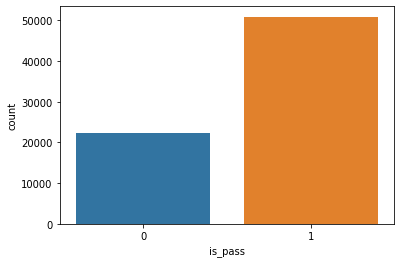

In [146]:
sns.countplot(train['is_pass'])


#As we can see data is imbalenced

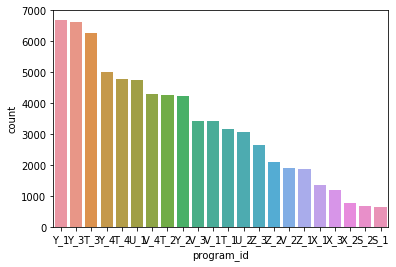

In [147]:

sns.countplot(train['program_id'],order = train['program_id'].value_counts().index)



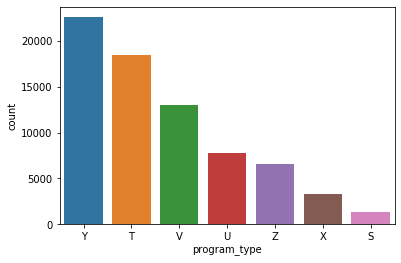

In [148]:
sns.countplot(train['program_type'],order = train['program_type'].value_counts().index)

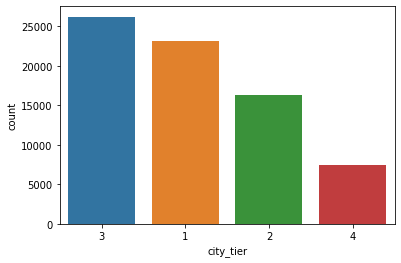

In [149]:
sns.countplot(train['city_tier'],order = train['city_tier'].value_counts().index)

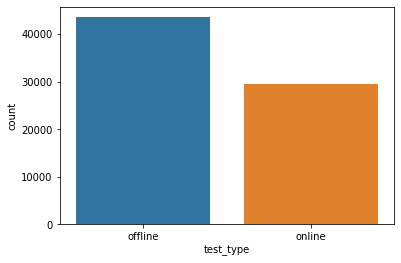

In [150]:
sns.countplot(train['test_type'],order = train['test_type'].value_counts().index)

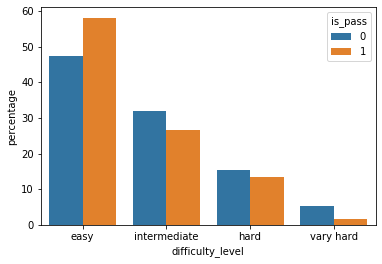

In [151]:
city_tier1 = (train.groupby(['is_pass'])['difficulty_level'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('is_pass'))
sns.barplot(x="difficulty_level", y="percentage", hue="is_pass", data=city_tier1)


In [152]:

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
final_1=train.iloc[:,11].values
final_1= final_1.reshape(-1,1)
imp.fit(final_1)
final_1=imp.transform(final_1)
train['age']= final_1


final_2=train.iloc[:,14].values
final_2=final_2.reshape(-1,1)
imp.fit(final_2)
final_2=imp.transform(final_2)
train['trainee_engagement_rating']=final_2


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          73147 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73147 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [154]:

train['difficulty_level']=train['difficulty_level'].replace(to_replace ="easy", value ='1')
train['difficulty_level']=train['difficulty_level'].replace(to_replace ="intermediate", value ='2')
train['difficulty_level']=train['difficulty_level'].replace(to_replace ="hard", value ='3')
train['difficulty_level']=train['difficulty_level'].replace(to_replace ="vary hard", value ='4')
train['difficulty_level']=train['difficulty_level'].astype(int)


train['education']=train['education'].replace(to_replace ="No Qualification", value ='1')
train['education']=train['education'].replace(to_replace ="Matriculation", value ='2')
train['education']=train['education'].replace(to_replace ="High School Diploma", value ='3')
train['education']=train['education'].replace(to_replace ="Bachelors", value ='4')
train['education']=train['education'].replace(to_replace ="Masters", value ='5')
train['education']=train['education'].astype(int)



train['city_tier']=train['city_tier'].replace(to_replace ="1", value ='3')
train['city_tier']=train['city_tier'].replace(to_replace ="3", value ='1')
train['city_tier']=train['city_tier'].astype(int)


train['program_type']=train['program_type'].map({'Y':1, 'T':3, 'V':5, 'U':4, 'Z':2, 'X':0, 'S':6})

train['test_type']=train['test_type'].map({'online':1, 'offline':0})

train['gender']=train['gender'].map({'M':1, 'F':0})
train['is_handicapped']=train['is_handicapped'].map({'Y':1, 'N':0})


In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null int64
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null int64
difficulty_level             73147 non-null int32
trainee_id                   73147 non-null int64
gender                       73147 non-null int64
education                    73147 non-null int32
city_tier                    73147 non-null int32
age                          73147 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null int64
trainee_engagement_rating    73147 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int32(3), int64(9), object(2)
memory usage: 8.1+ MB


In [156]:
train.drop(['program_id','id'],axis =1, inplace= True)


In [158]:

x= train.loc[:, train.columns != 'is_pass']


x.info()

y=train.iloc[:,13].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 13 columns):
program_type                 73147 non-null int64
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null int64
difficulty_level             73147 non-null int32
trainee_id                   73147 non-null int64
gender                       73147 non-null int64
education                    73147 non-null int32
city_tier                    73147 non-null int32
age                          73147 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null int64
trainee_engagement_rating    73147 non-null float64
dtypes: float64(2), int32(3), int64(8)
memory usage: 6.4 MB


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [159]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
cols = x.columns
x, y = smote.fit_sample(x, y)
x = pd.DataFrame(x, columns = cols)
y = pd.Series(y, name = 'target')




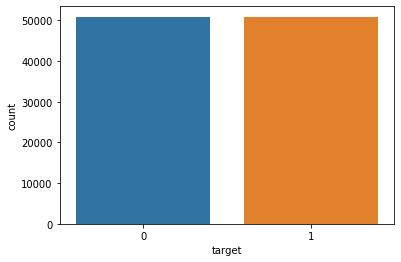

In [160]:
sns.countplot(y)

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 101)


In [162]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [163]:
classifier = RandomForestClassifier()

classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
pred_i = classifier.predict(x_test)

In [165]:
from sklearn.metrics import confusion_matrix
CM= confusion_matrix(y_test, pred_i)
CM

array([[8339, 1834],
       [1848, 8326]], dtype=int64)

In [166]:
test= pd.read_csv('C:/Users/soura/Desktop/python project/python/test_wF0Ps6O.csv')
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


In [167]:
final_3=test.iloc[:,11].values
final_3= final_3.reshape(-1,1)
imp.fit(final_3)
final_3=imp.transform(final_3)
test['age']= final_3


final_4=test.iloc[:,14].values
final_4=final_4.reshape(-1,1)
imp.fit(final_4)
final_4=imp.transform(final_4)
test['trainee_engagement_rating']=final_4

In [168]:

test['difficulty_level']=test['difficulty_level'].replace(to_replace ="easy", value ='1')
test['difficulty_level']=test['difficulty_level'].replace(to_replace ="intermediate", value ='2')
test['difficulty_level']=test['difficulty_level'].replace(to_replace ="hard", value ='3')
test['difficulty_level']=test['difficulty_level'].replace(to_replace ="vary hard", value ='4')
test['difficulty_level']=test['difficulty_level'].astype(int)


test['education']=test['education'].replace(to_replace ="No Qualification", value ='1')
test['education']=test['education'].replace(to_replace ="Matriculation", value ='2')
test['education']=test['education'].replace(to_replace ="High School Diploma", value ='3')
test['education']=test['education'].replace(to_replace ="Bachelors", value ='4')
test['education']=test['education'].replace(to_replace ="Masters", value ='5')
test['education']=test['education'].astype(int)



test['city_tier']=test['city_tier'].replace(to_replace ="1", value ='3')
test['city_tier']=test['city_tier'].replace(to_replace ="3", value ='1')
test['city_tier']=test['city_tier'].astype(int)


test['program_type']=test['program_type'].map({'Y':1, 'T':3, 'V':5, 'U':4, 'Z':2, 'X':0, 'S':6})

test['test_type']=test['test_type'].map({'online':1, 'offline':0})

test['gender']=test['gender'].map({'M':1, 'F':0})
test['is_handicapped']=test['is_handicapped'].map({'Y':1, 'N':0})


In [169]:
test.drop(['program_id'],axis =1, inplace= True)



In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 14 columns):
id                           31349 non-null object
program_type                 31349 non-null int64
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null int64
difficulty_level             31349 non-null int32
trainee_id                   31349 non-null int64
gender                       31349 non-null int64
education                    31349 non-null int32
city_tier                    31349 non-null int32
age                          31349 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null int64
trainee_engagement_rating    31349 non-null float64
dtypes: float64(2), int32(3), int64(8), object(1)
memory usage: 3.0+ MB


In [171]:
final= test.loc[:, test.columns != 'id']


In [173]:
test['is_pass']= classifier.predict(final)
columns_1=['id','is_pass']

output=test[columns_1]

output.to_csv('output546.csv',index=False)
